In [1]:
# Load all bibles
# Takes about 3 minutes

from os import listdir
from os.path import isfile, join
from tqdm.notebook import tqdm
from iso639 import Lang

path = "/Users/laura/llmResearch/scripture/"
files = [f for f in listdir(path) if isfile(join(path, f))]
print('Before processing - number of Bibles:',len(files))

bibles = []
languages = []
filepaths = []

# Don't include the languages we want to test on
test_languages = ['bft','bcw','bap','ksr','gbj','acw','kje','kfc','kxv','kwf','lmp','mgz','nxq','rjs','kan','tdd','rro','cja']

# Cache previously seen iso-3 language codes (speeds it up considerably)
language_codes = {}
# Exceptions
language_codes['pou'] = 'poc'
language_codes['sgjj'] = 'sgj' # typo
language_codes['in'] = 'ind' # best guess - indonesian
language_codes['wra'] = 'wra'
language_codes['pltA'] = 'plt'
language_codes['pltB'] = 'plt'
language_codes['thfL'] = 'thf'
language_codes['bapL'] = 'bap'
language_codes['dud'] = 'dud'
language_codes['eng'] = 'Latn'
language_codes['deu'] = 'Latn'

for file_name in tqdm(files):
  with open(path + file_name,"r",encoding="utf-8") as file:
    lines = [i[:-1] for i in file.readlines()] # remove ending newline

  if len([i for i in lines if i!='']) == 0: # skip empty bibles
    continue

  if len(lines) != 41899: # only use full bibles (previous calculations show only about 7% of bibles aren't full)
    continue

  # Find iso-3 language code for each language
  language = file_name[:file_name.find('-')]
  if language in language_codes:
    iso_code = language_codes[language]
  else:
    try:
      iso_code = Lang(language).pt3
    except: # can't find language code
      iso_code = ''
    language_codes[language] = iso_code

  if iso_code not in test_languages:
    languages.append(iso_code)
    bibles.append(lines)
    filepaths.append(file_name)

print('After processing - final number of Bibles:',len(bibles))
print('Number of unknown languages:',len([i for i in languages if i==''])) # number of unknown language codes

Before processing - number of Bibles: 3474


  0%|          | 0/3474 [00:00<?, ?it/s]

After processing - final number of Bibles: 3130
Number of unknown languags: 13


In [3]:
import pandas as pd

iso_scripts = pd.read_csv('data/iso_scripts.csv')

In [21]:
for script in set(not_in_dict):
  code = list(iso_scripts[iso_scripts['Alias']==script]['Code'])[0]
  print("script_codes['"+script.upper()+"'] = '" + code + "'")

script_codes['VAI'] = 'Vaii'
script_codes['TAI_THAM'] = 'Lana'
script_codes['TIFINAGH'] = 'Tfng'
script_codes['GEORGIAN'] = 'Geor'
script_codes['LISU'] = 'Lisu'
script_codes['HIRAGANA'] = 'Hira'
script_codes['SYRIAC'] = 'Syrc'
script_codes['COMMON'] = 'Zyyy'
script_codes['MONGOLIAN'] = 'Mong'
script_codes['CANADIAN_ABORIGINAL'] = 'Cans'
script_codes['KAYAH_LI'] = 'Kali'
script_codes['LIMBU'] = 'Limb'
script_codes['HAN'] = 'Hani'


In [22]:
# Find the script for each Bible
# Takes about 2.5 minutes

import sys
import os
sys.path.append(os.path.abspath("/Users/laura/silnlp/silnlp/common"))
from script_utils import get_script

#https://en.wikipedia.org/wiki/ISO_15924
# also can generate this automatically using code above
script_codes = {}
script_codes['CYRILLIC'] = 'Cyrl'
script_codes['LATIN'] = 'Latn'
script_codes['KANNADA'] = 'Knda'
script_codes['GUJARATI'] = 'Gujr'
script_codes['ARABIC'] = 'Arab'
script_codes['BENGALI'] = 'Beng'
script_codes['DEVANAGARI'] = 'Deva'
script_codes['ETHIOPIC'] = 'Ethi'
script_codes['GEORGIA'] = 'Geor'
script_codes['GREEK'] = 'Grek'
script_codes['GURMUKHI'] = 'Guru'
script_codes['HANGUL'] = 'Hang'
script_codes['HEBREW'] = 'Hira'
script_codes['KHMER'] = 'Khmr'
script_codes['LAO'] = 'Laoo'
script_codes['MALAYALAM'] = 'Mlym'
script_codes['MYANMAR'] = 'Mymr'
script_codes['ORIYA'] = 'Orya'
script_codes['SINHALA'] = 'Sinh'
script_codes['TAMIL'] = 'Taml'
script_codes['TELUGU'] = 'Telu'
script_codes['THAI'] = 'Thai'
script_codes['TIBETAN'] = 'Tibt'
script_codes['VAI'] = 'Vaii'
script_codes['TAI_THAM'] = 'Lana'
script_codes['TIFINAGH'] = 'Tfng'
script_codes['GEORGIAN'] = 'Geor'
script_codes['LISU'] = 'Lisu'
script_codes['HIRAGANA'] = 'Hira'
script_codes['SYRIAC'] = 'Syrc'
script_codes['COMMON'] = 'Zyyy'
script_codes['MONGOLIAN'] = 'Mong'
script_codes['CANADIAN_ABORIGINAL'] = 'Cans'
script_codes['KAYAH_LI'] = 'Kali'
script_codes['LIMBU'] = 'Limb'
script_codes['HAN'] = 'Hani'

llm_tags = []
not_in_dict = []
for i in tqdm(range(len(bibles))):
  not_empty = [k for k in bibles[i] if k != ''] # find non-empty verses
  script = get_script(''.join(not_empty[:10])) # look at 10 verses to determine script
  if script.upper() in script_codes:
    llm_tags.append(languages[i] + '_' + script_codes[script.upper()])
  else:
    not_in_dict.append(script)
    llm_tags.append(languages[i] + '_Othr')

print('scripts not in dictionary',set(not_in_dict))

  0%|          | 0/3130 [00:00<?, ?it/s]

scripts not in dictionary set()


In [23]:
num_verses = []
for verse in tqdm(range(41899)):
  num_verses.append(len([i for i in bibles if i[verse] != '']))

  0%|          | 0/41899 [00:00<?, ?it/s]

In [24]:
num_verses[:10]

[1681, 1667, 1659, 1659, 1659, 1660, 1660, 1659, 1658, 1656]

In [27]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


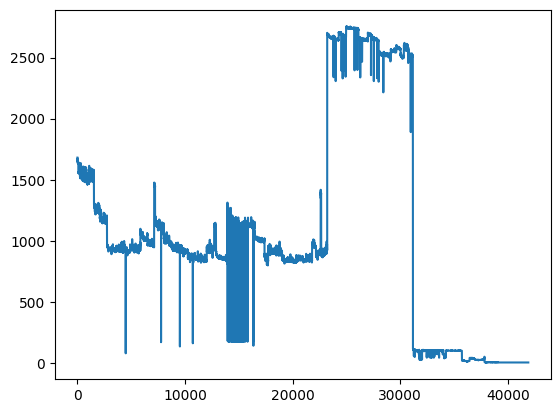

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(num_verses)

In [32]:
from collections import Counter
counter = Counter()
for llm_tag in tqdm(llm_tags):
  script = llm_tag.split('_')[1]
  counter[script]+=1

  0%|          | 0/3130 [00:00<?, ?it/s]

In [34]:
plt.plot(counter)

In [3]:
import json

def write_llm_input(src_sentence,trg_sentence,src_tag,trg_tag,output_file):
  data = {
    "model_inputs": f"translate "+src_tag+" to "+trg_tag+": "+src_sentence.strip(),
    "completion": f"{trg_sentence.strip()}"
  }
  json.dump(data, output_file)
  output_file.write("\n")

with open('all_scripture_llm_input.jsonl', 'w') as output_file:
  for verse in tqdm(range(41899)):
    for i in range(len(bibles)):
      for j in range(len(bibles)):
        src_sentence = bibles[i][verse]
        trg_sentence = bibles[j][verse]
        if i!=j and src_sentence!='' and trg_sentence!='':
          write_llm_input(src_sentence, trg_sentence, llm_tags[i], llm_tags[j], output_file)
          write_llm_input(trg_sentence, src_sentence, llm_tags[j], llm_tags[i], output_file)


  0%|          | 0/41899 [00:00<?, ?it/s]